In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from parse import *

This code will be implemented in a Python script to automate tasks in a SSH environment. The main objective of this notebook is go step by step in the process of reading and parsing the output file of an OpenFOAM solver to plot the desired results in a graphic. 

In [2]:
# Read the file specified in the route and store it in "lines"
lines = []
with open ('exampleOutput.txt', 'rt') as file: 
    # for all lines in the file
    for line in file: 
        # append them to 'lines'
        lines.append(line)

In [3]:
# count the ocurrences of Times in 'lines'
# divide them by two (for each iteration there are two lines 'Time' and 'ClockTime')
# and make it an integer
iterNo = int(len([s for s in lines if "Time = " in s])/2)

The parser will look up for values by comparing with some predefined blocks. These blocks have been defined for <tt> pimpleFoam </tt> and there are two blocks because the solver makes some adjustements that sometimes includes a line (having different blocks)

In [4]:
exampleLine1 = "Time = {}\n\
\n\
smoothSolver:  Solving for Ux, Initial residual = {}, Final residual = {}, No Iterations {}\n\
smoothSolver:  Solving for Uy, Initial residual = {}, Final residual = {}, No Iterations {}\n\
GAMG:  Solving for p, Initial residual = {}, Final residual = {}, No Iterations {}\n\
time step continuity errors : sum local = {}, global = {}, cumulative = {}\n\
smoothSolver:  Solving for epsilon, Initial residual = {}, Final residual = {}, No Iterations {}\n\
smoothSolver:  Solving for k, Initial residual = {}, Final residual = {}, No Iterations {}\n\
ExecutionTime = {} s  ClockTime = {} s\n\
\n"

In [5]:
exampleLine2 = "Time = {}\n\
\n\
smoothSolver:  Solving for Ux, Initial residual = {}, Final residual = {}, No Iterations {}\n\
smoothSolver:  Solving for Uy, Initial residual = {}, Final residual = {}, No Iterations {}\n\
GAMG:  Solving for p, Initial residual = {}, Final residual = {}, No Iterations {}\n\
time step continuity errors : sum local = {}, global = {}, cumulative = {}\n\
smoothSolver:  Solving for epsilon, Initial residual = {}, Final residual = {}, No Iterations {}\n\
bounding epsilon, min: {} max: {} average: {}\n\
smoothSolver:  Solving for k, Initial residual = {}, Final residual = {}, No Iterations {}\n\
ExecutionTime = {} s  ClockTime = {} s\n\
\n"

In [6]:
# given that there are two example blocks, some corrections are needed when storing data
exL12 = [[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,19,20,21,22,23],
         [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

In [7]:
# parameters to automate plotting task (first figure)
elementsPlot1 = [1,4,7,13,19]
confPlot1 = ['r','g','y','b','orange']
legendPlot1 = [r'$U_x$',r'$U_y$',r'$\varepsilon$',r'$k$',r'$p$']


In [8]:
# parameters to automate plotting task (second figure)
elementsPlot2 = [11,12]
confPlot2 = ['g','r']
legendPlot2 = ['Global','Cumulative']

In [9]:
# here exampleLine2 has more values to parse than exampleLine1
# so it will be used for preallocation purposes
values = np.zeros((iterNo, exampleLine2.count('{}'))) 

In [10]:
# iterate along the number of iterations
for i in range(1,iterNo):
    # exampleLine1
    if lines.index('Time = %i\n' %(i+1))-lines.index('Time = %i\n' %(i)) == exampleLine1.count('\n'): 
        # correct the position to store them in the correct location of the values matrix
        for j in range(len(exL12[0])):
            values[i,exL12[0][j]] = float(parse(exampleLine1, ''.join(lines[lines.index('Time = %i\n' %(i)):lines.index('Time = %i\n' %(i+1))])).fixed[exL12[1][j]])
    # exampleLine2
    elif lines.index('Time = %i\n' %(i+1))-lines.index('Time = %i\n' %(i)) == exampleLine2.count('\n'):
        # store all the values as they come in the block
        for j in range(exampleLine2.count('{}')):
            values[i,j] = float(parse(exampleLine2, ''.join(lines[lines.index('Time = %i\n' %(i)):lines.index('Time = %i\n' %(i+1))])).fixed[j])

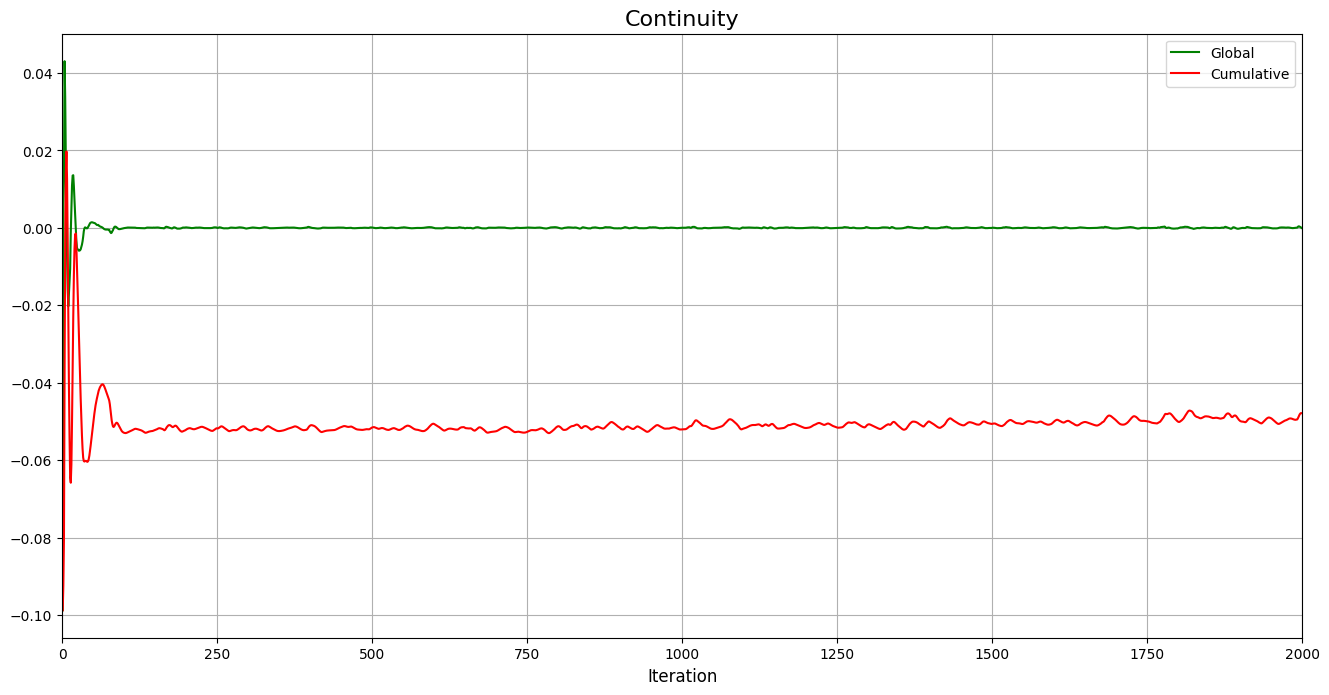

In [11]:
fig, ax = plt.subplots(figsize=(16,8), dpi=100)
# using the lists defined before for plotting
for i in range(len(elementsPlot2)):
    ax.plot(values[values[:,0] != 0,0],values[values[:,0] != 0,elementsPlot2[i]],c=confPlot2[i],label=legendPlot2[i])
# adding other options to the figure
ax.set_xlim(0,iterNo)
ax.set_title('Continuity',fontsize=16)
ax.set_xlabel('Iteration',fontsize=12)
ax.legend()
ax.grid()
# plt.savefig('continuity.png', bbox_inches = 'tight')

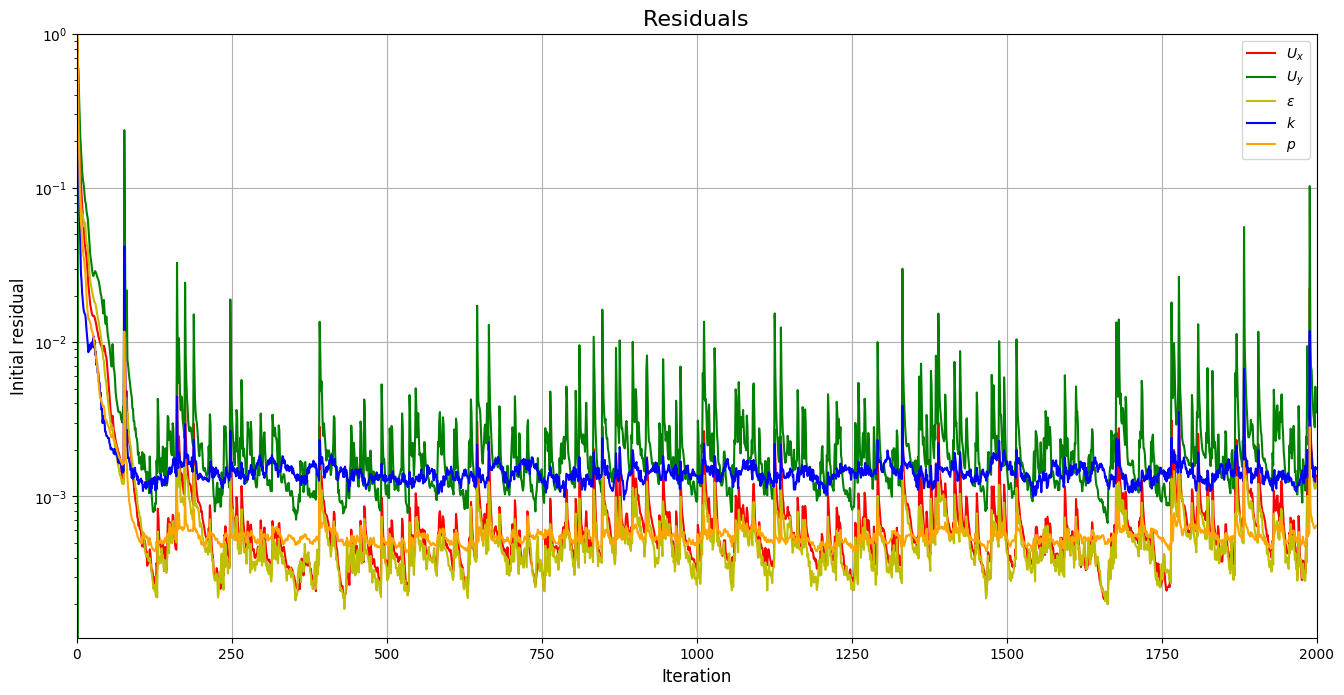

In [12]:
fig, ax = plt.subplots(figsize=(16,8), dpi=100)
# using the lists defined before for plotting
for i in range(len(elementsPlot1)):
    ax.semilogy(values[values[:,0] != 0,0],values[values[:,0] != 0,elementsPlot1[i]],c=confPlot1[i],label=legendPlot1[i])
# adding other options to the figure
ax.set_xlim(0,iterNo)
ax.set_ylim(None, 1)
ax.set_title('Residuals',fontsize=16)
ax.set_xlabel('Iteration',fontsize=12)
ax.set_ylabel('Initial residual',fontsize=12)
ax.legend()
ax.grid()
# plt.savefig('residuals.png', bbox_inches = 'tight')